<center>
<hr>
<hr>
<font style="font-size:5.4em ; color:black'" > 
<span style="background : yellow">
#6-2 Integration 
</span>
</font>
<hr>
<hr>
</center>


In [2]:
%matplotlib inline
from IPython.display import display,Latex,Math,HTML
import sympy as sym
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<center>
<hr>
<font size="20" color='Blue' >Trapezoidal Rule</font>
<hr>
</center>

### Chap 21 Example 1 Trapezoidal

#### Problem Statement : 
>  a) Use single segment Trapezoidal rule to find the distance covered.

>
>  b) Find the true error, Et for part (a).

>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [3]:
Latex(""" \\begin{equation*} \\huge
      x(t) = \\int_8^{30}( 2000\\ln[{140000\\over 140000-2100t}]-9.8t)dt
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [4]:
def func(t):
    return 2000*math.log(140000/(140000-2100*t))-9.8*t

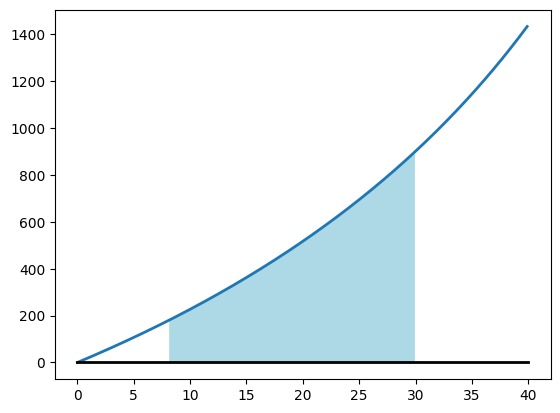

In [5]:
xi = np.array([i*0.1 for i in range(0, 400)])
yi = np.array([func(i) for i in xi])

fig, ax = plt.subplots()
line, = ax.plot(xi, yi, lw=2)
line2 = ax.plot([0,40],[0,0], lw=2, color='black')        
plt.fill_between(xi,yi,0, where = (30 > xi) & (xi > 8),color="lightblue",  edgecolor="b", linewidth=0.0)


In [6]:


a = 8
b = 30

print(f'f({a}) = {func(a):0.5} m/s, '
        f'f({b}) = {func(b):0.5} m/s')
I = (b-a)*(func(a)+func(b))/2
print(f'I = ({b}-{a})[({func(a):0.5}+{func(b):0.5})/2] = {I:0.6} m')

f(8) = 177.27 m/s, f(30) = 901.67 m/s
I = (30-8)[(177.27+901.67)/2] = 11868.3 m


>  b) Find the true error, Et for part (a).

In [85]:
from scipy.integrate import quad

It, err = quad(func, 8, 30)
print(f'Integral: {It:8.7} m')
print(f'error in quad integration is {err:0.6} m')

Integral: 11061.34 m
error in quad integration is 1.22805e-10 m


In [8]:
Et = ((It-I))
print(f'Absolute True Error: {Et:0.6} m')

Absolute True Error: -807.013 m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).

In [9]:
error = abs((Et/It)*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 7.2958 %


<center>
<hr>
<font size="20" color='Blue' >Multi-segment Trapezoidal Rule</font>
<hr>
</center>

In [10]:
a = 8
b = 19

print(f'f({a}) = {func(a):0.5} m/s, '
        f'f({b}) = {func(b):0.5} m/s')
I1 = (b-a)*(func(a)+func(b))/2
print(f'I1 = ({b}-{a})[({func(a):0.5}+{func(b):0.5})/2] = {I1:0.6} m')

a = 19
b = 30

print(f'f({a}) = {func(a):0.5} m/s, '
        f'f({b}) = {func(b):0.5} m/s')
I2 = (b-a)*(func(a)+func(b))/2
print(f'I2 = ({b}-{a})[({func(a):0.5}+{func(b):0.5})/2] = {I2:0.6} m')

I = I1 + I2
print(f'I1 + I2 = {I:0.6} m')


f(8) = 177.27 m/s, f(19) = 484.75 m/s
I1 = (19-8)[(177.27+484.75)/2] = 3641.07 m
f(19) = 484.75 m/s, f(30) = 901.67 m/s
I2 = (30-19)[(484.75+901.67)/2] = 7625.31 m
I1 + I2 = 11266.4 m


In [11]:
Et = ((It-I))
print(f'Absolute True Error: {Et:0.6} m')

Absolute True Error: -205.039 m


In [12]:
def integ(f,a,b):
    return (b-a)*(f(a)+f(b))/2


In [13]:
a = 8
b = 30

n = 2
I =0
for i in range(n):
    aa = a + (b-a)*i/(n)
    bb = a + (b-a)*(i+1)/(n)
    I += integ(func,aa,bb)

print(f'Integral: {I:0.6} m')

Integral: 11266.4 m


### Chap 21 Example 2 Multi-segment Trapezoidal

#### Problem Statement : 
>  a) Use two segment Trapezoidal rule to find the distance covered.
>
>  b) Find the true error, Et for part (a).
>
>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [14]:
def mtrapezoidal(f,a,b,n):
    h = (b-a)/n
    I = 0
    for i in range(n):
        I += f(a + h*i) + f(a + h*(i+1))
    return h*I/2

In [15]:
I = mtrapezoidal(func,8,30,2)
print(f'Integral: {I:0.6} m')

Integral: 11266.4 m


>  b) Find the true error, Et for part (a)

In [16]:
Et = ((It-I))
print(f'Absolute True Error: {Et:0.6} m')

Absolute True Error: -205.039 m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).

In [17]:
error = abs((Et/It)*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 1.85365 %


In [18]:
I = [mtrapezoidal(func,8,30,i) for i in range(1,9)]

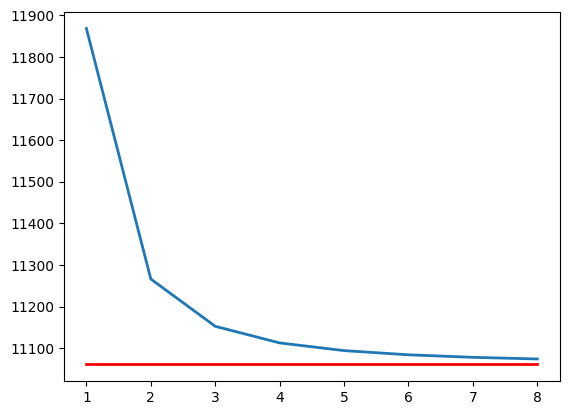

In [19]:
xi = np.array([i for i in range(1, 9)])
yi = np.array([i for i in I])

fig, ax = plt.subplots()
line, = ax.plot(xi, yi, lw=2)
line2 = ax.plot([1,8],[11061,11061], lw=2, color='red')        
# plt.fill_between(xi,yi,0, where = (30 > xi) & (xi > 8),color="lightblue",  edgecolor="b", linewidth=0.0)


### Chap 21 Example 3 Multi-segment Trapezoidal

#### Problem Statement : 
>  a) Use two segment Trapezoidal rule to find the distance covered.
>
>  b) Find the true error, Et for part (a).
>
>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [20]:
Latex(""" \\begin{equation*} \\huge
      f(x) = { 300 x \\over 1+e^{x}},~ 0<x<10
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [21]:
def func(x):
    return 300*x/(1+math.exp(x))

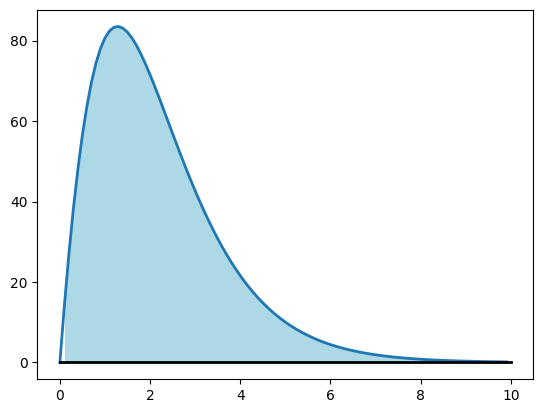

In [22]:
xi = np.array([i*0.1 for i in range(0, 100)])
yi = np.array([func(i) for i in xi])

fig, ax = plt.subplots()
line, = ax.plot(xi, yi, lw=2)
line2 = ax.plot([0,10],[0,0], lw=2, color='black')        
plt.fill_between(xi,yi,0, where = (10 > xi) & (xi > 0),color="lightblue",  edgecolor="b", linewidth=0.0)


In [23]:
I = mtrapezoidal(func,0,10,2)
print(f'Approximate Integral: {I:0.6} m')

Approximate Integral: 50.5369 m


In [24]:
It, err = quad(func, 0, 10)
print(f'Actual Integral: {It:0.6} m')  

Actual Integral: 246.59 m


>  b) Find the true error, Et for part (a).



In [25]:
Et = ((It-I))
print(f'Absolute True Error: {Et:0.6} m')

Absolute True Error: 196.053 m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [26]:
error = abs((Et/It)*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 79.5057 %


In [27]:
n = 2
I = [mtrapezoidal(func,0,10,n**i) for i in range(7)]
for i in range(7):
    print(f'Approximate Integral: {I[i]:0.6} m')

Approximate Integral: 0.680968 m
Approximate Integral: 50.5369 m
Approximate Integral: 170.612 m
Approximate Integral: 227.044 m
Approximate Integral: 241.704 m
Approximate Integral: 245.369 m
Approximate Integral: 246.285 m


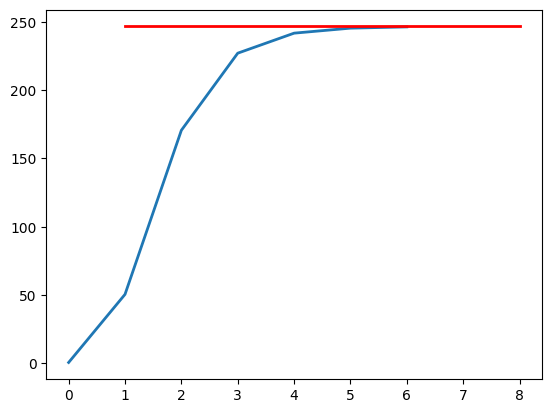

In [28]:
xi = np.array([i for i in range(7)])
yi = np.array([i for i in I])

fig, ax = plt.subplots()
line, = ax.plot(xi, yi, lw=2)
line2 = ax.plot([1,8],[246.59,246.59], lw=2, color='red')        
# plt.fill_between(xi,yi,0, where = (30 > xi) & (xi > 8),color="lightblue",  edgecolor="b", linewidth=0.0)


<center>
<hr>
<font style="font-size:3.4em ; color:Blue ; background-color : Blue'" >Simpson's Rule</font>
<hr>
</center>

### Chap 21 Example 1 Simpson's 1/3 Rule

#### Problem Statement : 
>  a) Use Simpson's 1/3 rule to find the distance covered.
>
>  b) Find the true error, Et for part (a).
>
>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [29]:
Latex(""" \\begin{equation*} \\huge
      x(t) = \\int_8^{30}( 2000\\ln[{140000\\over 140000-2100t}]-9.8t)dt
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [30]:
def func(t):
    return 2000*math.log(140000/(140000-2100*t))-9.8*t

In [31]:
a = 8
b = 30
x = (b-a)/6*(func(a)+4*func(a/2+b/2)+func(b))
print(f'Approximate Integral: {x:0.6} m')

Approximate Integral: 11065.7 m


>  b) Find the true error, Et for part (a).


In [32]:
xt, err = quad(func, 8, 30) 
print(f'Actual Integral: {xt:0.6} m')

Actual Integral: 11061.3 m


In [33]:
Et = ((xt-x))
print(f'Absolute True Error: {Et:0.6} m')

Absolute True Error: -4.38079 m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [34]:
error = abs((Et/xt)*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 0.0396046 %


### Chap 21 Example 2 Simpson's 1/3 Rule 4 segments

#### Problem Statement : 
>  a) Use four segment Simpson's 1/3 rule to find the distance covered.
>
>  b) Find the true error, Et for part (a).
>
>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [35]:
Latex(""" \\begin{equation*} \\huge
      x(t) = \\int_8^{30}( 2000\\ln[{140000\\over 140000-2100t}]-9.8t)dt
      \\end{equation*å} 
      """)

<IPython.core.display.Latex object>

In [36]:
def func(t):
    return 2000*math.log(140000/(140000-2100*t))-9.8*t

In [37]:
def msimpson(f,a,b,n,output=False):
    h = (b-a)/n
    if output:
        print(f'h = {h}')
    I = f(a) + f(b)
    if output:
        print(f'f(a) = {f(a):0.6}')
    for i in range(1,n,2):
        I +=  4*f(a + h*i)
        if output:
            print(f'4*f(a + {h}*{i}) = {4}*{f(a + h*i):0.6}= {4*f(a + h*i):0.6}')
    for i in range(2,n,2):
        I += 2*f(a + h*i)
        if output:
            print(f'2*f(a + {h}*{i}) = {2}*{f(a + h*i):0.6}= {2*f(a + h*i):0.6}')
    if output:        
        print(f'f(b) = {f(b):0.6}')        
    return h*I/3

In [38]:
a = 8
b = 30
n = 4
x = msimpson(func,a,b,n,True)
print(f'Approximate Integral: {x:0.6} m')

h = 5.5
f(a) = 177.267
4*f(a + 5.5*1) = 4*320.247= 1280.99
4*f(a + 5.5*3) = 4*676.05= 2704.2
2*f(a + 5.5*2) = 2*484.745= 969.491
f(b) = 901.674
Approximate Integral: 11061.6 m


>  b) Find the true error, Et for part (a).


In [39]:
Et = ((xt-x))
print(f'Absolute True Error: {Et:0.6} m')

Absolute True Error: -0.300602 m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [40]:
error = abs((Et/xt)*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 0.0027176 %


In [41]:

I = [msimpson(func,8,30,i) for i in range(2,11,2)]
for n,i in enumerate(I):
    print(f'n = {2*(n+1)}: Approximate Integral: {i:0.7} m')

n = 2: Approximate Integral: 11065.72 m
n = 4: Approximate Integral: 11061.64 m
n = 6: Approximate Integral: 11061.4 m
n = 8: Approximate Integral: 11061.35 m
n = 10: Approximate Integral: 11061.34 m


(11060.0, 11070.0)

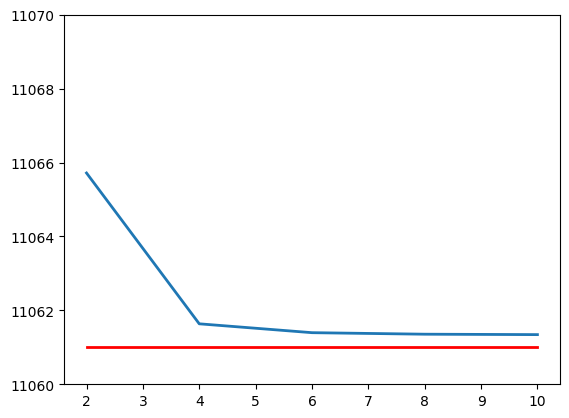

In [50]:
xi = np.array([i for i in range(2, len(I)*2+1, 2)])
yi = np.array([i for i in I])

fig, ax = plt.subplots()
line, = ax.plot(xi, yi, lw=2)
line2 = ax.plot([2,10],[11061,11061], lw=2, color='red')    
ax.set_ylim(11060, 11070)    
# plt.fill_between(xi,yi,0, where = (30 > xi) & (xi > 8),color="lightblue",  edgecolor="b", linewidth=0.0)


<center>
<hr>
<font style="font-size:3.4em ; color:blue'" > 
<span style="color:blue ;background : lightgreen">
Romberg Rule of Integration 
</span>
</font>
<hr>
</center>


### Chap 21 Example 1 Richardson Rule 2 & 4 segments

#### Problem Statement : 
>  a) Use Richardson’s rule to find the distance covered. 
   Use the 2-segment and 4-segment Trapezoidal  
   rule results given in Table 1.
>
>  b) Find the true error, Et for part (a).
>
>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [53]:
Latex(""" \\begin{equation*} \\huge
      x(t) = \\int_8^{30}( 2000\\ln[{140000\\over 140000-2100t}]-9.8t)dt
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [51]:
def func(t):
    return 2000*math.log(140000/(140000-2100*t))-9.8*t

In [56]:
def richardson(f,a,b,n,output=False):
    I = mtrapezoidal(f,a,b,n)
    I2 = mtrapezoidal(f,a,b,2*n)
    if output:
        print(f'I = {I:0.6}, I2 = {I2:0.6}')
        print(f'approx integ. = {I2 + (I2-I)/3:0.6}')
    return I2 + (I2-I)/3

In [57]:
integ2 = richardson(func,8,30,2,True)
integ4 = richardson(func,8,30,4,True)
print(f'Approximate 2 seg Integral: {integ2:0.6} m')
print(f'Approximate 4 seg Integral: {integ4:0.6} m')

I = 11266.4, I2 = 11112.8
approx integ. = 11061.6
I = 11112.8, I2 = 11074.2
approx integ. = 11061.4
Approximate 2 seg Integral: 11061.6 m
Approximate 4 seg Integral: 11061.4 m


>  b) Find the true error, Et for part (a).


In [66]:
Et = ((xt-integ2))
print(f'Absolute True Error: {xt:0.6} - {integ2:0.6}={Et:0.6} m')

Absolute True Error: 11061.3 - 11061.6=-0.300602 m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [67]:
error = abs((Et/xt)*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 0.0027176 %


In [68]:
Et = round(xt)-round(integ2)
error = abs((round(Et)/round(xt))*100)
print(f'Relative True Error: {error:0.6} %')

Relative True Error: 0.00904077 %


### Chap 21 Example 2 Richardson Rule 1, 2, 4, 8 segments

#### Problem Statement : 
>  a) Use Romberg’s rule to find the distance covered. Use the 1, 2, 4, and 8-segment Trapezoidal rule results as given in the Table 1.
>

In [82]:
def romberg(f,a,b,n):
    R = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        R[i][0] = mtrapezoidal(f,a,b,2**i)
    for j in range(1,n):
        for i in range(j,n):
            R[i][j] = (4**j*R[i][j-1]-R[i-1][j-1])/(4**j-1)
    return R

In [83]:
I = [romberg(func,8,30,i) for i in range(2,9,2)]
for n,i in enumerate(I):
    print(f'n = {2*(n+1)}: ')
    for j in i:
        for k in j:
            print(f'{float(k):8.7}', end=' ')
        print()


n = 2: 
11868.35      0.0 
11266.37 11065.72 
n = 4: 
11868.35      0.0      0.0      0.0 
11266.37 11065.72      0.0      0.0 
11112.82 11061.64 11061.36      0.0 
11074.22 11061.35 11061.34 11061.34 
n = 6: 
11868.35      0.0      0.0      0.0      0.0      0.0 
11266.37 11065.72      0.0      0.0      0.0      0.0 
11112.82 11061.64 11061.36      0.0      0.0      0.0 
11074.22 11061.35 11061.34 11061.34      0.0      0.0 
11064.56 11061.34 11061.34 11061.34 11061.34      0.0 
11062.14 11061.34 11061.34 11061.34 11061.34 11061.34 
n = 8: 
11868.35      0.0      0.0      0.0      0.0      0.0      0.0      0.0 
11266.37 11065.72      0.0      0.0      0.0      0.0      0.0      0.0 
11112.82 11061.64 11061.36      0.0      0.0      0.0      0.0      0.0 
11074.22 11061.35 11061.34 11061.34      0.0      0.0      0.0      0.0 
11064.56 11061.34 11061.34 11061.34 11061.34      0.0      0.0      0.0 
11062.14 11061.34 11061.34 11061.34 11061.34 11061.34      0.0      0.0 
11061.54 11061

<center>
<hr>
<font style="font-size:3.4em ; color:blue'" > 
<span style="color:blue ;background : lightgreen">
Gauss Quad Rule of Integration 
</span>
</font>
<hr>
</center>


### Chap 22 Example 2 Gauss Quad Rule 

#### Problem Statement : 
>  a) Use two-point Gauss Quadrature Rule to approximate the distance covered by a rocket from t=8 to t=30
>
>  b) Find the true error, Et for part (a).
>
>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [86]:
Latex(""" \\begin{equation*} \\huge
      x(t) = \\int_8^{30}( 2000\\ln[{140000\\over 140000-2100t}]-9.8t)dt
      \\end{equation*} 
      """)

<IPython.core.display.Latex object>

In [87]:
def func(t):
    return 2000*math.log(140000/(140000-2100*t))-9.8*t

In [94]:
def gauss_quad(f,a,b,output=False):
    x1 = (b-a)/2*(-1/math.sqrt(3))+(b+a)/2
    x2 = (b-a)/2*(1/math.sqrt(3))+(b+a)/2
    c1 = (b-a)/2
    c2 = (b-a)/2
    if output:
        print(f'x1 = {x1:0.6}, x2 = {x2:0.6}')
        print(f'c1 = {c1:0.6}, c2 = {c2:0.6}')
    return c1*f(x1)+c2*f(x2)

In [96]:
integ = gauss_quad(func,8,30,True)
print(f'2-point Gauss Quad Approximate Integral: {integ:0.6} m')

x1 = 12.6491, x2 = 25.3509
c1 = 11.0, c2 = 11.0
2-point Gauss Quad Approximate Integral: 11058.4 m


In [99]:
def ngauss_quad(f,a,b,n):
    x = [0 for i in range(n)]
    c = [0 for i in range(n)]
    if n == 2:
        x[0] = -1/math.sqrt(3)
        x[1] = 1/math.sqrt(3)
        c[0] = 1
        c[1] = 1
    elif n == 3:
        x[0] = -math.sqrt(3/5)
        x[1] = 0
        x[2] = math.sqrt(3/5)
        c[0] = 5/9
        c[1] = 8/9
        c[2] = 5/9
    elif n == 4:
        x[0] = -0.861136
        x[1] = -0.339981
        x[2] = 0.339981
        x[3] = 0.861136
        c[0] = 0.347855
        c[1] = 0.652145
        c[2] = 0.652145
        c[3] = 0.347855
    else:
        print('Error: n must be 2, 3, or 4')
        return
    I = 0
    for i in range(n):
        I += c[i]*f((b-a)/2*x[i]+(b+a)/2)
    return (b-a)/2*I

In [101]:
I = [ngauss_quad(func,8,30,i) for i in range(2,5)]
for i in range(3):
    print(f'{i+2}-point Gauss Quad Approximate Integral: {I[i]:0.7} m')


2-point Gauss Quad Approximate Integral: 11058.44 m
3-point Gauss Quad Approximate Integral: 11061.31 m
4-point Gauss Quad Approximate Integral: 11061.34 m


>  b) Find the true error, Et for part (a).




In [108]:
Et = ((xt-np.array(I)))
for e in Et:
    print(f'Absolute True Error: {e:0.6}m')

Absolute True Error: 2.89475m
Absolute True Error: 0.0271403m
Absolute True Error: 0.000417031m


>  c) Find the absolute relative true error, |𝜖_𝑎 | for part (a).


In [109]:
error = abs((Et/xt)*100)
for e in error:
    print(f'Relative True Error: {e:0.6} %')

Relative True Error: 0.02617 %
Relative True Error: 0.000245362 %
Relative True Error: 3.77017e-06 %


<center>
<hr>
<font size="20" color='Blue' >The end...</font>
<hr>
</center>